<a href="https://colab.research.google.com/github/ckaarle/class/blob/training/training/credit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [285]:
import numpy as np
import pandas as pd

import io

import tensorflow as tf

# Data

In [205]:
from google.colab import files

In [206]:
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [207]:
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

# Prepare data sets

In [212]:
label_column = 'Risk'

In [214]:
y_train = train[label_column]
y_test = test[label_column]

In [215]:
X_train = train.drop(columns=[label_column])
X_test = test.drop(columns=[label_column])

# Define NN architecture

In [261]:
input = tf.keras.Input(shape=(28))
x = tf.keras.layers.Dense(64, activation="relu")(input)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

In [262]:
model = tf.keras.Model(inputs=input, outputs=output)

In [269]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
)

In [270]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28)]              0         
                                                                 
 dense_20 (Dense)            (None, 64)                1856      
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dense_22 (Dense)            (None, 256)               33024     
                                                                 
 dense_23 (Dense)            (None, 64)                16448     
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 59,713
Trainable params: 59,713
Non-trainable

# Train NN

In [286]:
history = model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=20
)

Epoch 1/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9862
Epoch 2/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0286 - accuracy: 0.9862
Epoch 3/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0277 - accuracy: 0.9900
Epoch 4/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0291 - accuracy: 0.9875
Epoch 5/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0246 - accuracy: 0.9900
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 0.0290 - accuracy: 0.9875
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9875
Epoch 8/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0410 - accuracy: 0.9862
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0473 - accuracy: 0.9837
Epoch 10/20
7/7 [==============================] - 0s 5ms/step - loss: 0.0464 - accuracy: 0.9812
Epoch 11/20
7/7 [======================

# Save model

In [287]:
model.save('credit_model')

INFO:tensorflow:Assets written to: credit_model/assets


In [288]:
!zip -r /content/credit_model.zip /content/credit_model

updating: content/credit_model/ (stored 0%)
updating: content/credit_model/saved_model.pb (deflated 88%)
updating: content/credit_model/keras_metadata.pb (deflated 89%)
updating: content/credit_model/variables/ (stored 0%)
updating: content/credit_model/variables/variables.data-00000-of-00001 (deflated 9%)
updating: content/credit_model/variables/variables.index (deflated 66%)
updating: content/credit_model/assets/ (stored 0%)


In [289]:
from google.colab import files
files.download("/content/credit_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluate model with regard to test set performance

In [290]:
test_scores = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.7882 - accuracy: 0.8700


In [299]:
y_pred = model.predict(X_test) > 0.5

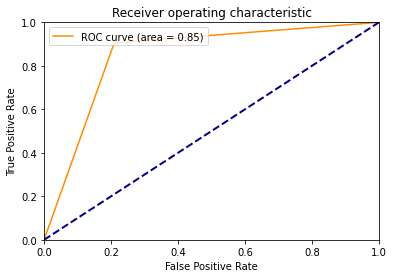

In [300]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
#Plot of a ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
          label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="upper left")

In [301]:
f1_score(y_test, y_pred)

0.9057971014492753

In [302]:
accuracy_score(y_test, y_pred)

0.87